In [1]:
import sys
sys.path.append("..")
from roeProcessTools import *
from sklearn.tree import DecisionTreeRegressor

In [2]:
dirPath = "/Users/zch/Desktop/internship/data/"
paths = {"chem":"chemClean32.xlsx", "mach":"machClean32.xlsx", "food":"foodClean32.xlsx", "elec":"elecClean32.xlsx"}
df = pd.read_excel(dirPath+paths["chem"])

In [5]:
code = "000698"
company, y = getCompanyByCode(code, df)

In [7]:
company

,code,name,2000-12,2001-03,2001-06,2001-09,2001-12,2002-03,2002-06,2002-09,...,2018-06,2018-09,2018-12,2019-03,2019-06,2019-09,2019-12,2020-03,2020-06,2020-09
15,000698.SZ,沈阳化工,NaN,NaN,NaN,NaN,NaN,0.2974,0.6039,-0.0387,...,0.7011,0.7624,0.3559,0.711,0.633,-2.60144,-2.60144,-2.60144,-1.3098,3.4356


In [10]:
y = np.array(y.dropna())

In [14]:
x = np.arange(len(y)).reshape(-1,1)

In [40]:
model3 = DecisionTreeRegressor(min_samples_leaf=5)

In [41]:
model3.fit(x, y)

DecisionTreeRegressor(min_samples_leaf=5)

In [42]:
X_test = np.arange(len(y))[:, np.newaxis]

In [43]:
yhat = model3.predict(X_test)

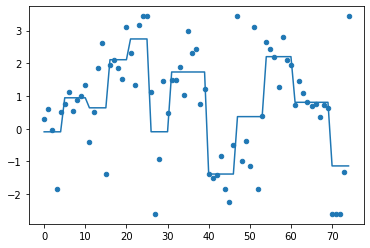

In [44]:
plt.scatter(x, y, s=20)
plt.plot(X_test, yhat)

In [48]:
def test(y, min_leaf=5):
    x = np.arange(len(y)).reshape(-1,1)
    model3 = DecisionTreeRegressor(min_samples_leaf=min_leaf)
    model3.fit(x, y)
    X_test = np.arange(len(y))[:, np.newaxis]
    yhat = model3.predict(X_test)
    fig, axs = plt.subplots()
    axs.scatter(x, y, s=20)
    axs.plot(X_test, yhat)

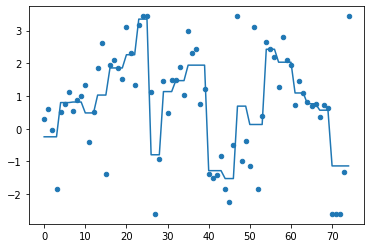

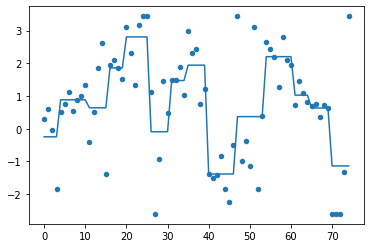

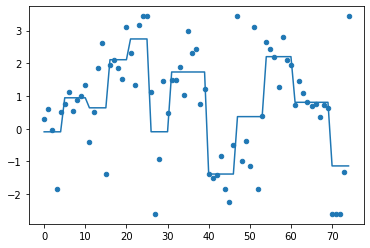

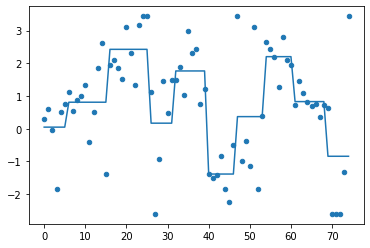

In [52]:
print()
for i in range(3, 7):
    test(y, min_leaf=i)

In [57]:
# for code in df.code.values[:10]:
#     print(code)
#     company, y = getCompanyByCode(code, df)
#     y.dropna(inplace=True)
#     test(y, min_leaf=4)